In [8]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

Time: 5.47 s, Acceleration Y: -0.03, Change in Gradient: 22.33
Time: 5.47 s, Acceleration Y: 0.24, Change in Gradient: -79.92
Time: 5.48 s, Acceleration Y: -1.00, Change in Gradient: 71.48
Time: 5.49 s, Acceleration Y: 0.46, Change in Gradient: 61.60
Time: 5.50 s, Acceleration Y: 0.24, Change in Gradient: -89.22
Time: 5.51 s, Acceleration Y: 0.22, Change in Gradient: -15.43
Time: 5.52 s, Acceleration Y: -0.26, Change in Gradient: 12.28
Time: 5.53 s, Acceleration Y: -0.08, Change in Gradient: 28.71
Time: 5.53 s, Acceleration Y: -0.08, Change in Gradient: -13.75
Time: 5.59 s, Acceleration Y: -0.26, Change in Gradient: -12.25

Absolute maximum change in gradient: -89.22 at Time: 5.50 s



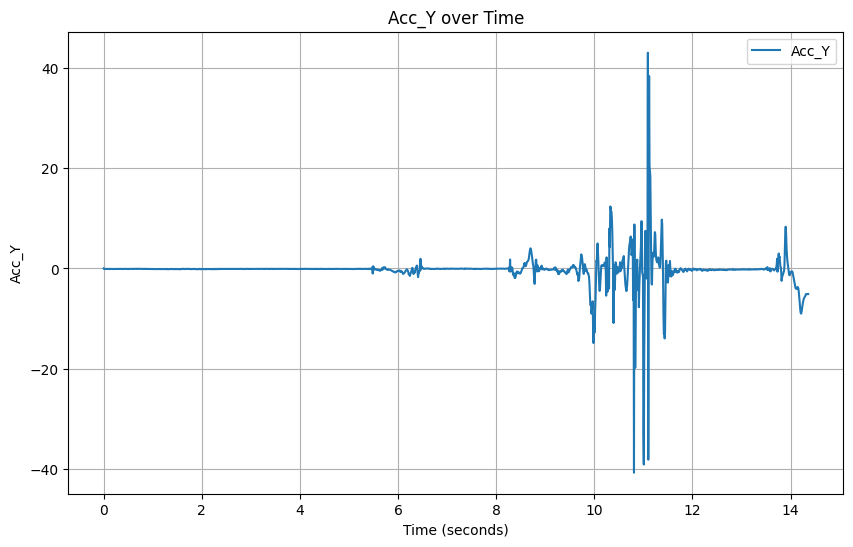

In [14]:
df = pd.read_csv('../P4/IMU/shots/Foot_left/shot1.csv')
df['time_seconds'] = df.index * (1/120)
df['Acc_Y_derivative'] = np.gradient(df['Acc_Y'], df['time_seconds'])
    
# Calculate the change_in_gradient column
df['change_in_gradient'] = np.diff(df['Acc_Y_derivative'], prepend=df['Acc_Y_derivative'][0])

# Set the threshold and skip points
threshold = 10
skip_points = 50

# Create a mask for significant changes in gradient
mask = np.abs(df['change_in_gradient']) > threshold
adjusted_mask = np.zeros_like(mask, dtype=bool)
adjusted_mask[skip_points:] = mask[skip_points:]

# Extract the relevant data points
time_seconds_high_change = df['time_seconds'][adjusted_mask]
Acc_Y_high_change = df['Acc_Y'][adjusted_mask]
change_in_gradient_high_change = df['change_in_gradient'][adjusted_mask]

# Get the first 10 changes in gradient
first_10_count = 10
time_seconds_first_10 = time_seconds_high_change.head(first_10_count)
Acc_Y_first_10 = Acc_Y_high_change.head(first_10_count)
change_in_gradient_first_10 = change_in_gradient_high_change.head(first_10_count)

# Find the maximum change in gradient among the first 10
max_change_index = change_in_gradient_first_10.abs().idxmax()
max_time = time_seconds_first_10.loc[max_change_index]
max_change = change_in_gradient_first_10.loc[max_change_index]

# Print the results#print(f"First 10 changes in gradient for {csv_file} (excluding the first 50 points):")
for t, acc, change in zip(time_seconds_first_10, Acc_Y_first_10, change_in_gradient_first_10):
    print(f"Time: {t:.2f} s, Acceleration Y: {acc:.2f}, Change in Gradient: {change:.2f}")

print(f"\nAbsolute maximum change in gradient: {max_change:.2f} at Time: {max_time:.2f} s\n")

# Plot Acc_Y value
plt.figure(figsize=(10, 6))
plt.plot(df['time_seconds'], df['Acc_Y'], label='Acc_Y')
plt.xlabel('Time (seconds)')
plt.ylabel('Acc_Y')
plt.title('Acc_Y over Time')
plt.legend()
plt.grid(True)
plt.show()
